<a href="https://colab.research.google.com/github/jsolom12/Audioenhancement/blob/main/NumericalAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Part -1 Numerical inversion by Binary Search
# The function take two required params f which is a non decreasing function and  y value
# and the function return x value such that f(x) =y

def invert(f, y, d= None):

  #if no range given do the finite search dynamically
  if d is None:
    a,b = y,y

    #finding the lower bound and upper bound
    while f(a) > y:
      a/=2

    while f(b) < y:
      b*=2
  else:
    a, b = d

    #doing the binary search
    tolerance = 1e-7
    max_iteration = 10000

    for i in range(max_iteration):
      mid = (a+b) /2
      mid_function = f(mid)

#searching the right and the left side
      if abs(mid_function -y) < tolerance:
        return mid
      elif mid_function < y:
        a= mid
      else:
        b = mid
    return (a+b) /2




In [2]:
# 1.1 Transcendental Function
import math

def transcendental_func(x):
  return x * math.exp(x) + x


In [3]:
#Test cases
#Target value = 20
yvalue = 20

x_value_approx = invert(transcendental_func, yvalue,d=(0, 10))

print(f'The x value such that f(x) = {yvalue} (for f(x) = xe^x + x) is approximately: {x_value_approx}')

The x value such that f(x) = 20 (for f(x) = xe^x + x) is approximately: 2.1280345181003213


In [4]:
#checking if the above value is correct
result =  transcendental_func(x_value_approx)
print(result)

19.99999999002163


In [5]:
# Defining  a set of test values for y
test_values = [5, 10, 20, 50, 100]

# Performing the inversion and checking the results
def test_inversion():
    for y in test_values:
        # Finding x
        x_approx = invert(transcendental_func, y, d=(0, 10))

        # Checking  if f(x_approx) is close to y
        f_x_approx = transcendental_func(x_approx)

        print(f"For y = {y}, x ~ {x_approx}, and f(x_approx) = {f_x_approx}")
        print(f"Difference from y: {abs(f_x_approx - y)}")

# Runing the test
test_inversion()


For y = 5, x ~ 1.1775052547454834, and f(x_approx) = 4.999999924088485
Difference from y: 7.591151529595663e-08
For y = 10, x ~ 1.6335061751306057, and f(x_approx) = 10.000000072075782
Difference from y: 7.207578178736185e-08
For y = 20, x ~ 2.1280345181003213, and f(x_approx) = 19.99999999002163
Difference from y: 9.978368353813494e-09
For y = 50, x ~ 2.817989136092365, and f(x_approx) = 50.000000009331444
Difference from y: 9.331444061899674e-09
For y = 100, x ~ 3.3592750458046794, and f(x_approx) = 100.0000000549988
Difference from y: 5.4998793075355934e-08


In [6]:
#1.2 -> Gamma Function

from scipy.special import gamma

def test_gamma():
  y_values = [5, 10, 50, 100]

  for i in y_values:
    x_approx = invert(gamma,i, d=(1.5, 16))

    f_x_approx = gamma(x_approx)

    print(f'The x value such that Gamma(x) = {i} is approximate: {x_approx}')
    print(f'Gamma({x_approx}) = {f_x_approx}')
    print(f'Difference from target y: {abs(f_x_approx - i)}\n')
test_gamma()

The x value such that Gamma(x) = 5 is approximate: 3.852355470880866
Gamma(3.852355470880866) = 5.000000077950296
Difference from target y: 7.795029599577674e-08

The x value such that Gamma(x) = 10 is approximate: 4.390077646356076
Gamma(4.390077646356076) = 9.99999993906034
Difference from target y: 6.093966042897137e-08

The x value such that Gamma(x) = 50 is approximate: 5.47152745857602
Gamma(5.47152745857602) = 50.000000029554336
Difference from target y: 2.955433586748768e-08

The x value such that Gamma(x) = 100 is approximate: 5.892518696375191
Gamma(5.892518696375191) = 100.00000000529852
Difference from target y: 5.298517180563067e-09



In [7]:
#Part 2- Numerical Integration
#using monte carlo
import numpy as np

def integrate(f, tuple_range):
  start, end = tuple_range
  no_of_samples = 1000000

  x_values = np.random.uniform(start, end, no_of_samples)
  value_of_f = f(x_values)

  #estimating the integral
  est_integral = (end - start) * np.mean(value_of_f )

  return  est_integral



In [8]:
def f(x):
  return np.where(x ==0,1, np.sin(x) /x)

In [9]:
value_integrated = integrate(f,(-1,1))

print("The integral value is: ",value_integrated )

The integral value is:  1.892127901589435


In [10]:
#Part 3- Gradient Descent
import math
#returns : an array of tuples consisting of the sequence of points where the gradient is evaluated, starting from the start point
def opt(grad, start, step, max_gradient_length):

  points = [start]
  tolerance = 1e-6
  max_iterations = 1000000
  curr_point = start

  for i in range(max_iterations):
    gradient = grad(curr_point) #calculating the gradient and the gradient length
    grad_length = math.sqrt(sum([j**2 for j in gradient]))

    #now doing the clipping part if the length exceeds
    if grad_length > max_gradient_length:
      gradient = tuple(j / grad_length * max_gradient_length for  j in gradient)
    #updating current point using the gradient andstep size and then checking if the change is smaller than tolerance
    point_upd = tuple(p - step * q for p,q in zip(curr_point, gradient))

    if math.sqrt(sum([(p -k) ** 2 for p, k in zip(curr_point, point_upd)])) < tolerance:
      break


    curr_point = point_upd
    points.append(curr_point)

  return points







In [11]:
#3.1 Three-Hump Camel Function
import numpy as np
import matplotlib.pyplot as plt
# Implement the function thcf with a single tuple parameter p, giving the coordinates  x1 and x2  to evaluate the function
def thcf(p):
  x1, x2 = p
  return 2 * x1**2 - 1.05 * x1**4 + (x1**6 / 6) + x1 * x2 + x2**2





In [12]:
#Implement the gradient function, thcf_grad that accepts a point and returns the gradient of that point, both as tuples.
def thcf_grad(p):
  x1,x2 = p
  df_dx1 = 4 * x1 - 4.2 * x1**3 + x1**5 + x2
  df_dx2 = x1 + 2 * x2
  return (df_dx1, df_dx2)

In [13]:

#In this cell, put in code that checks using a finite differnce that your thcf_grad function is implemented correctly.
import numpy as np

def gradient_check(function, grad_function, step=1e-5, no_of_checks=5, seed=None):

    # Setting  random seed
    if seed is not None:
        np.random.seed(seed)

    # Performing the gradient check in domain [-5, 5]
    for i in range(no_of_checks):
        # Randomizing the   points in the range -5, 5
        point = (np.random.uniform(-5, 5), np.random.uniform(-5, 5))

        # Computing the analytic gradient
        grad_analytic = grad_function(point)

        # Computing finite difference approximation of the gradient
        grad_fd = []
        for j in range(len(point)):
            delta = np.zeros_like(point)
            delta = list(delta)
            delta[j] = step

            f_plus = function(tuple(p + dp for p, dp in zip(point, delta)))
            f_minus = function(tuple(p - dp for p, dp in zip(point, delta)))
            grad_fd.append((f_plus - f_minus) / (2 * step))

        # Converting the  grad_fd to a tuple
        grad_fd = tuple(grad_fd)

        # Computing  relative error between analytic and finite difference gradients
        rel_error = np.linalg.norm(np.array(grad_analytic) - np.array(grad_fd)) / \
                    (np.linalg.norm(np.array(grad_analytic)) + np.linalg.norm(np.array(grad_fd)) + 1e-8)


        print(f"Check {i + 1}/{no_of_checks}:")
        print(f"Random Point: {point}")
        print(f"Analytic Gradient: {grad_analytic}")
        print(f"Finite Difference Gradient: {grad_fd}")
        print(f"Relative Error: {rel_error}\n")




In [14]:
#testing
gradient_check(thcf, thcf_grad,step=1e-5,no_of_checks=20, seed=42)

Check 1/20:
Random Point: (-1.254598811526375, 4.507143064099161)
Analytic Gradient: (4.674435187492887, 7.759687316671947)
Finite Difference Gradient: (4.674435187368431, 7.759687316344354)
Relative Error: 1.9342239862036e-11

Check 2/20:
Random Point: (2.3199394181140507, 0.986584841970366)
Analytic Gradient: (25.02650350973367, 4.293109102054783)
Finite Difference Gradient: (25.026503513103645, 4.293109102082582)
Relative Error: 6.636111991295046e-11

Check 3/20:
Random Point: (-3.439813595575635, -3.4400547966379733)
Analytic Gradient: (-327.84201369632086, -10.319923188851583)
Finite Difference Gradient: (-327.84201371072186, -10.31992318871744)
Relative Error: 2.195339556156104e-11

Check 4/20:
Random Point: (-4.419163878318005, 3.6617614577493516)
Analytic Gradient: (-1336.937419308726, 2.904359037180698)
Finite Difference Gradient: (-1336.9374192791383, 2.9043590416222282)
Relative Error: 1.1189425075015192e-11

Check 5/20:
Random Point: (1.0111501174320878, 2.0807257779604544)

In [15]:
#Find the global minimum, possibly using multiple runs of your opt function. Your code should not have a hard-coded starting point.
def find_global_min():
  global_min = None
  best_value = float('inf')
  best_path = None


  for i in range(1000):
    start_point = (np.random.uniform(-5,5), np.random.uniform(-5,5))
    path = opt(thcf_grad, start_point, step=0.01, max_gradient_length=1.0)
    last = path[-1]
    value = thcf(last)
#update the best value and gloabal min if a lower value is found
    if value < best_value:
      best_value =value
      global_min = last
      best_path = path

  return global_min, best_value, best_path


In [16]:
global_min, best_value, best_path = find_global_min()
print(f"Global Minimum: {global_min}, Function Value: {best_value}")


Global Minimum: (-2.3751777213278938e-05, 5.7343352061418426e-05), Function Value: 3.054547344058649e-09


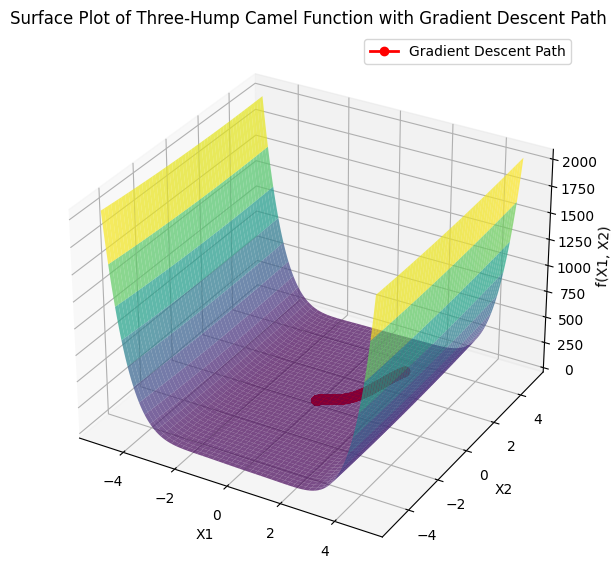

In [17]:
#Generate a surface plot or contour plot of the function,
#showing the path of the gradient descent that found the global minimum. You can use the matplotlib library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_grad(path):

    # Generating  a meshgrid for plotting
    x = np.linspace(-5, 5, 400)
    y = np.linspace(-5, 5, 400)
    X, Y = np.meshgrid(x, y)
    Z = thcf((X, Y))

    fig = plt.figure(figsize=(10, 7))

    #3d Surface plot
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

    # Add the gradient descent path to the plot
    path_x = [p[0] for p in path]
    path_y = [p[1] for p in path]
    path_z = [thcf(p) for p in path]

    ax.plot(path_x, path_y, path_z, color='r', marker='o', label='Gradient Descent Path', linewidth=2)

    # Set plot labels and title
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('f(X1, X2)')
    plt.title("Surface Plot of Three-Hump Camel Function with Gradient Descent Path")
    plt.legend()
    plt.show()

plot_grad(best_path)



In [ ]:
#3.2 2-D Shubert Function
# Implement the function sf with a single tuple parameter p, giving the coordinate x1 and x2 to evaluate the function
import numpy as np

def sf(p):
  x1, x2 = p
  sum1 = sum(i * np.cos((i + 1) * x1 + i) for i in range(1, 6))
  sum2 = sum(i * np.cos((i + 1) * x2 + i) for i in range(1, 6))
  return sum1 * sum2



In [ ]:
# Implement the gradient function, sf_grad that accepts a point and returns the gradient of that point, both as tuples


